#**Finding Forever Homes - Animal Shelter Survivability and Adoption Predictions for Long Beach, California, US**
#*by Megha Bhande and Agata Swiniarska*

### Animal Shelter Adoption Predictions - Cleaning, Processing, Modeling

In [2]:
# Import packages and load our dataset
import pandas as pd

In [3]:
df = pd.read_csv("animal-shelter-intakes-and-outcomes.csv")
df

,Animal ID,Animal Name,Animal Type,Primary Color,Secondary Color,Sex,DOB,Intake Date,Intake Condition,Intake Type,...,Crossing,Jurisdiction,Outcome Type,Outcome Subtype,latitude,longitude,intake_is_dead,outcome_is_dead,was_outcome_alive,geopoint
0,A604282,NaN,CAT,ORG TABBY,WHITE,Unknown,2017-08-28,2018-02-28,INJURED SEVERE,STRAY,...,"1700 BLK W 25TH ST, LONG BEACH, CA 90810",LONG BEACH,EUTHANASIA,INJ SEVERE,33.802303,-118.215724,Alive on Intake,True,0,"33.8023034, -118.2157238"
1,A606444,NaN,WILD,GRAY,NaN,Unknown,NaN,2018-04-20,UNDER AGE/WEIGHT,WILDLIFE,...,"1700 BLK W 32ND WAY, LONG BEACH, CA 90810",LONG BEACH,RETURN TO WILD HABITAT,NaN,33.816137,-118.215546,Alive on Intake,False,1,"33.8161367, -118.2155462"
2,A678201,*GIA,DOG,BLACK,CREAM,Female,2014-06-23,2022-06-23,NORMAL,STRAY,...,"1700 BLK W ANAHEIM ST, LONG BEACH, CA 90813",LONG BEACH,HOMEFIRST,NaN,33.782421,-118.216200,Alive on Intake,False,1,"33.7824214, -118.2161996"
3,A624662,NaN,WILD,GRAY,NaN,Unknown,2019-04-12,2019-04-13,NORMAL,WILDLIFE,...,"1700 BLK W BORT ST, LONG BEACH, CA 90805",LONG BEACH,RESCUE,OTHER RESC,33.870456,-118.204580,Alive on Intake,False,1,"33.8704558, -118.2045799"
4,A597162,NaN,CAT,ORANGE,WHITE,Female,2017-08-15,2017-09-15,UNDER AGE/WEIGHT,STRAY,...,"1700 BLK W CANTON ST, LONG BEACH, CA 90810",LONG BEACH,RESCUE,FNDANIFOUN,33.810801,-118.215532,Alive on Intake,False,1,"33.81080120000001, -118.2155321"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27226,A603007,NaN,DOG,BROWN,WHITE,Male,2011-01-24,2018-01-24,NORMAL,STRAY,...,"WOODRUFF AVE / E CARSON ST, LONG BEACH, CA 90808",LONG BEACH,TRANSFER,SPCALA,33.832336,-118.116539,Alive on Intake,False,1,"33.8323363, -118.1165386"
27227,A630046,NaN,DOG,TAN,NaN,Female,2014-07-17,2019-07-17,NORMAL,STRAY,...,"WOODRUFF AVE / E WARDLOW RD, LONG BEACH, CA 90808",LONG BEACH,TRANSFER,SPCALA,33.818753,-118.116312,Alive on Intake,False,1,"33.8187528, -118.1163116"
27228,A479602,SPIKE#2,DOG,TAN,NaN,Male,2006-05-07,2019-07-13,NORMAL,STRAY,...,"WOODRUFF AVE / E WARDLOW RD, LONG BEACH, CA 90808",LONG BEACH,RETURN TO OWNER,NaN,33.818753,-118.116312,Alive on Intake,False,1,"33.8187528, -118.1163116"
27229,A624000,NaN,WILD,BLACK,GRAY,Male,NaN,2019-03-30,INJURED MILD,WILDLIFE,...,"WOODRUFF AVE / E WILLOW ST, LONG BEACH, CA 90815",LONG BEACH,RETURN TO WILD HABITAT,NaN,33.803196,-118.114522,Alive on Intake,False,1,"33.803196, -118.1145217"


In [3]:
df.shape

(27231, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27231 entries, 0 to 27230
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Animal ID          27231 non-null  object 
 1   Animal Name        15944 non-null  object 
 2   Animal Type        27231 non-null  object 
 3   Primary Color      27231 non-null  object 
 4   Secondary Color    13088 non-null  object 
 5   Sex                27231 non-null  object 
 6   DOB                23865 non-null  object 
 7   Intake Date        27231 non-null  object 
 8   Intake Condition   27231 non-null  object 
 9   Intake Type        27231 non-null  object 
 10  Intake Subtype     26899 non-null  object 
 11  Reason for Intake  1969 non-null   object 
 12  Outcome Date       26984 non-null  object 
 13  Crossing           27231 non-null  object 
 14  Jurisdiction       27230 non-null  object 
 15  Outcome Type       26977 non-null  object 
 16  Outcome Subtype    237

In [5]:
list(df)

['Animal ID',
 'Animal Name',
 'Animal Type',
 'Primary Color',
 'Secondary Color',
 'Sex',
 'DOB',
 'Intake Date',
 'Intake Condition',
 'Intake Type',
 'Intake Subtype',
 'Reason for Intake',
 'Outcome Date',
 'Crossing',
 'Jurisdiction',
 'Outcome Type',
 'Outcome Subtype',
 'latitude',
 'longitude',
 'intake_is_dead',
 'outcome_is_dead',
 'was_outcome_alive',
 'geopoint']

In [6]:
df.describe()

,latitude,longitude,was_outcome_alive
count,27231.000000,27231.000000,27231.000000
mean,33.815447,-118.147832,0.794279
std,0.169716,0.571581,0.404235
min,19.297815,-122.695911,0.000000
25%,33.784370,-118.190545,1.000000
50%,33.807690,-118.173070,1.000000
75%,33.850527,-118.127413,1.000000
max,45.521885,-73.992360,1.000000


In [143]:
# Drop irrelevant columns with missing values
df.drop(columns=["Animal Name","Secondary Color","Reason for Intake"], axis=1, inplace=True)

In [144]:
df.drop(columns=["Crossing","intake_is_dead"], axis=1, inplace=True)

In [7]:
df.shape

(27231, 23)

In [8]:
# Count the number of missing values in each column 
df.isnull().sum()

Animal ID                0
Animal Name          11287
Animal Type              0
Primary Color            0
Secondary Color      14143
Sex                      0
DOB                   3366
Intake Date              0
Intake Condition         0
Intake Type              0
Intake Subtype         332
Reason for Intake    25262
Outcome Date           247
Crossing                 0
Jurisdiction             1
Outcome Type           254
Outcome Subtype       3447
latitude                 0
longitude                0
intake_is_dead           0
outcome_is_dead          0
was_outcome_alive        0
geopoint                 0
dtype: int64

In [147]:
# Remove rows with any missing values
df.dropna(how="any", inplace=True)

In [9]:
df.shape

(27231, 23)

In [149]:
# Change the date format in "DOB" column from dd-mm-yyyy to yyyy. 
df['DOB'] = pd.to_datetime(df['DOB'], format='%Y-%m-%d').dt.strftime('%Y')

In [150]:
df["DOB"]

0        2017
3        2019
4        2017
6        2016
7        2020
         ... 
27223    2015
27224    2008
27226    2011
27227    2014
27230    2017
Name: DOB, Length: 20543, dtype: object

In [151]:
# Rename the "DOB" column to "Birth Year" reflect the new format.
df.rename(columns={'DOB': 'Birth Year'}, inplace=True)

In [152]:
df["Birth Year"]

0        2017
3        2019
4        2017
6        2016
7        2020
         ... 
27223    2015
27224    2008
27226    2011
27227    2014
27230    2017
Name: Birth Year, Length: 20543, dtype: object

In [153]:
#Identify and remove outliers in column "Outcome Type"

df["Outcome Type"].value_counts()['FOSTER']

10

In [154]:
df = df[df["Outcome Type"] != "FOSTER"]

In [106]:
df["Outcome Type"].value_counts()['FOSTER TO ADOPT']

In [155]:
df = df[df["Outcome Type"] != "FOSTER TO ADOPT"]

In [10]:
# Add a column called "Days Spent in Shelter that contains the difference between Intake Date and Outcome Date"
df['Days Spent in Shelter'] = (pd.to_datetime(df['Outcome Date'], format="%Y-%m-%d") - pd.to_datetime(df['Intake Date'], format="%Y-%m-%d")).dt.days

# Print the modified DataFrame
print(df)

      Animal ID Animal Name Animal Type Primary Color Secondary Color  \
0       A604282         NaN         CAT     ORG TABBY           WHITE   
1       A606444         NaN        WILD          GRAY             NaN   
2       A678201        *GIA         DOG         BLACK           CREAM   
3       A624662         NaN        WILD          GRAY             NaN   
4       A597162         NaN         CAT        ORANGE           WHITE   
...         ...         ...         ...           ...             ...   
27226   A603007         NaN         DOG         BROWN           WHITE   
27227   A630046         NaN         DOG           TAN             NaN   
27228   A479602     SPIKE#2         DOG           TAN             NaN   
27229   A624000         NaN        WILD         BLACK            GRAY   
27230   A593423         NaN         CAT     BRN TABBY           WHITE   

           Sex         DOB Intake Date  Intake Condition Intake Type  ...  \
0      Unknown  2017-08-28  2018-02-28   INJUR

In [157]:
# Export the clean data to a csv file
df.to_csv('long-beach-animal-shelter-data-cleaned.csv', index=False)

### Data Visualization

In [4]:
df2 = pd.read_csv("long-beach-animal-shelter-data-cleaned.csv")
df2

,Animal ID,Animal Type,Primary Color,Sex,Birth Year,Intake Date,Intake Condition,Intake Type,Intake Subtype,Outcome Date,Jurisdiction,Outcome Type,Outcome Subtype,latitude,longitude,outcome_is_dead,was_outcome_alive,geopoint,Days Spent in Shelter
0,A604282,CAT,ORG TABBY,Unknown,2017,2018-02-28,INJURED SEVERE,STRAY,FIELD,2018-02-28,LONG BEACH,EUTHANASIA,INJ SEVERE,33.802303,-118.215724,True,0,"33.8023034, -118.2157238",0
1,A624662,WILD,GRAY,Unknown,2019,2019-04-13,NORMAL,WILDLIFE,OTC,2019-04-13,LONG BEACH,RESCUE,OTHER RESC,33.870456,-118.204580,False,1,"33.8704558, -118.2045799",0
2,A597162,CAT,ORANGE,Female,2017,2017-09-15,UNDER AGE/WEIGHT,STRAY,FIELD,2017-09-18,LONG BEACH,RESCUE,FNDANIFOUN,33.810801,-118.215532,False,1,"33.81080120000001, -118.2155321",3
3,A601269,DOG,BROWN,Female,2016,2017-12-21,NORMAL,STRAY,FIELD,2017-12-29,LONG BEACH,TRANSFER,SPCALA,33.788147,-118.171891,False,1,"33.7881471, -118.1718914",8
4,A651770,CAT,BLACK,Neutered,2020,2020-11-21,NORMAL,STRAY,OTC,2021-01-23,LONG BEACH,ADOPTION,PFE/PAWSHP,33.787839,-118.139462,False,1,"33.7878394, -118.1394618",63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20527,A588042,DOG,BLACK,Female,2015,2017-04-03,NORMAL,STRAY,OTC,2017-04-05,LONG BEACH,RETURN TO OWNER,WEB,33.843048,-118.136060,False,1,"33.8430481, -118.1360603",2
20528,A381591,DOG,BLACK,Neutered,2008,2018-06-07,NORMAL,STRAY,OTC,2018-06-07,LONG BEACH,RETURN TO OWNER,WALKIN,33.839591,-118.136081,False,1,"33.8395908, -118.1360806",0
20529,A603007,DOG,BROWN,Male,2011,2018-01-24,NORMAL,STRAY,OTC,2018-01-31,LONG BEACH,TRANSFER,SPCALA,33.832336,-118.116539,False,1,"33.8323363, -118.1165386",7
20530,A630046,DOG,TAN,Female,2014,2019-07-17,NORMAL,STRAY,OTC,2019-07-23,LONG BEACH,TRANSFER,SPCALA,33.818753,-118.116312,False,1,"33.8187528, -118.1163116",6


In [112]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


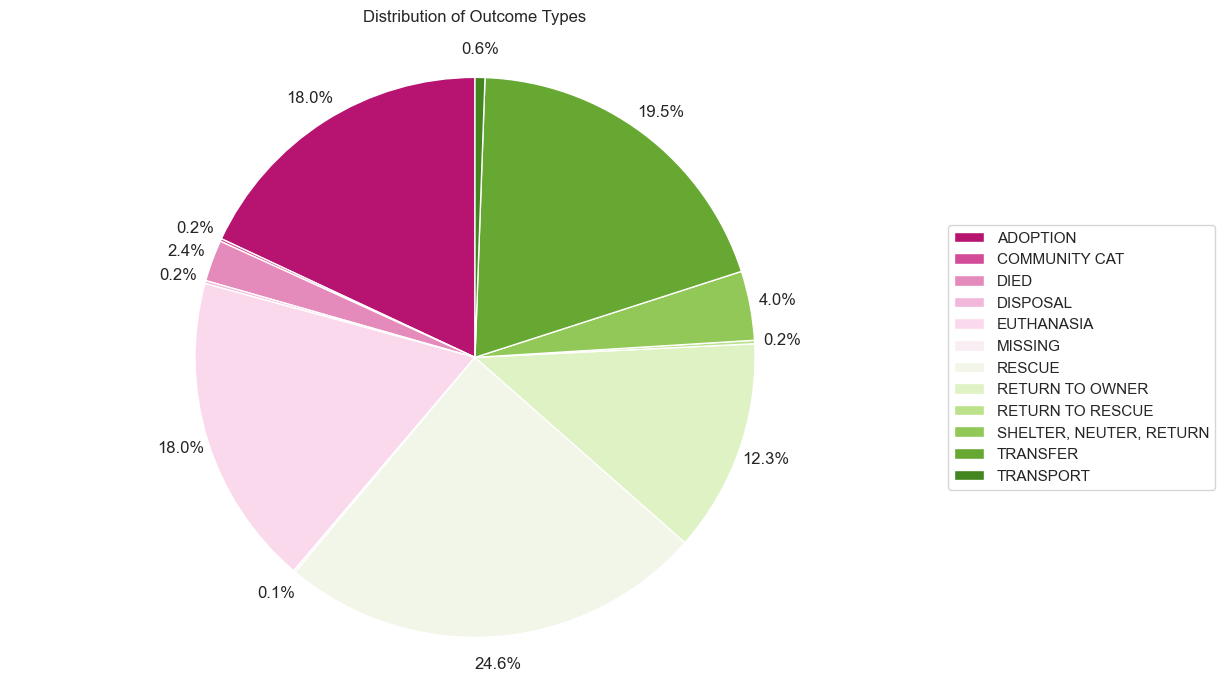

In [65]:
# Pie Chart - Outcome Type Distribution
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Counting unique 'Animal ID' within each 'Outcome Type'
outcome_animal_counts = df2.groupby('Outcome Type')['Animal ID'].nunique().reset_index()

# Set Seaborn style and palette
sns.set(style="whitegrid")
colors = sns.color_palette("PiYG", len(outcome_animal_counts))

# Creating a pie chart
plt.figure(figsize=(12, 8))
patches, texts, autotexts = plt.pie(outcome_animal_counts['Animal ID'], labels=None, autopct='%1.1f%%', startangle=90, labeldistance=3.0, pctdistance=1.1, colors=colors)
plt.title('Distribution of Outcome Types', pad=20)  # Adjust the pad value here

# Create legend
plt.legend(outcome_animal_counts['Outcome Type'], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

for autotext in autotexts:
    autotext.set_horizontalalignment('center')
    autotext.set_verticalalignment('center')

# Displaying the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

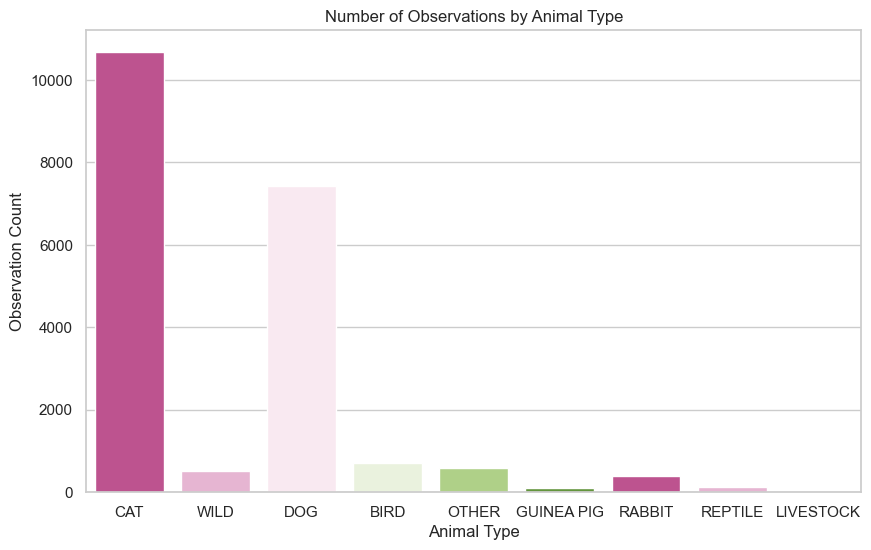

In [66]:
# Countplot - Observations by Animal Type

# Visual Size
plt.figure(figsize=(10, 6))
# Define color palette
palette = sns.color_palette("PiYG")
# Create the bar plot showing the count of observations for each animal type
sns.countplot(data=df2, x="Animal Type", palette=palette)
# Axis Details and Title
plt.title('Number of Observations by Animal Type')
plt.xlabel('Animal Type')
plt.ylabel('Observation Count')
# Show the plot
plt.show()

In [35]:
# Geovizualization heatmap illustrating areas of Long Beach that have registers the most intakes of animals. 
import folium
from folium.plugins import HeatMap
coordinates = df2['geopoint'].str.split(',', expand=True).astype(float)
print(coordinates)
coordinate_array = coordinates.values.tolist()
# Create a map
ap_map = folium.Map(location=[33.791147, -118.177982], zoom_start=4)
# Add a heatmap to the map
HeatMap(coordinate_array, radius=20, blur=5, min_opacity=0.5).add_to(ap_map)
# Display the map
ap_map

               0           1
0      33.802303 -118.215724
1      33.870456 -118.204580
2      33.810801 -118.215532
3      33.788147 -118.171891
4      33.787839 -118.139462
...          ...         ...
20527  33.843048 -118.136060
20528  33.839591 -118.136081
20529  33.832336 -118.116539
20530  33.818753 -118.116312
20531  33.789847 -118.138903

[20532 rows x 2 columns]


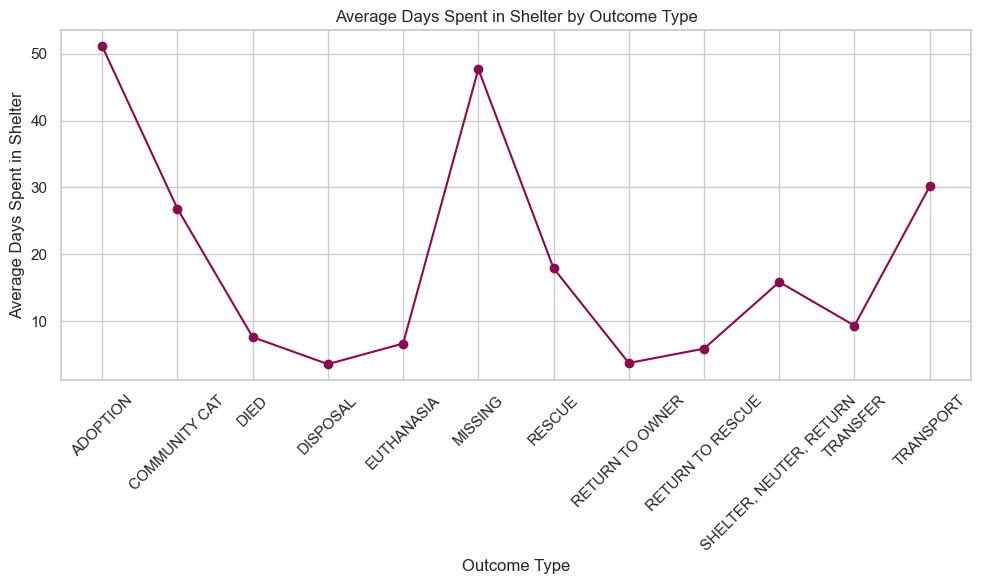

In [34]:
# Line chart showing correlation between Outcome Type and Time Spent in Shelter

# First, let's group the data by 'Outcome Type' and calculate the average days spent in shelter for each outcome type
avg_days_by_outcome = df2.groupby('Outcome Type')['Days Spent in Shelter'].mean()

# Now, let's create a line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_days_by_outcome.index, avg_days_by_outcome.values, marker='o', linestyle='-', color='#8B0A50')  # Change color to pink
plt.title('Average Days Spent in Shelter by Outcome Type')
plt.xlabel('Outcome Type')
plt.ylabel('Average Days Spent in Shelter')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

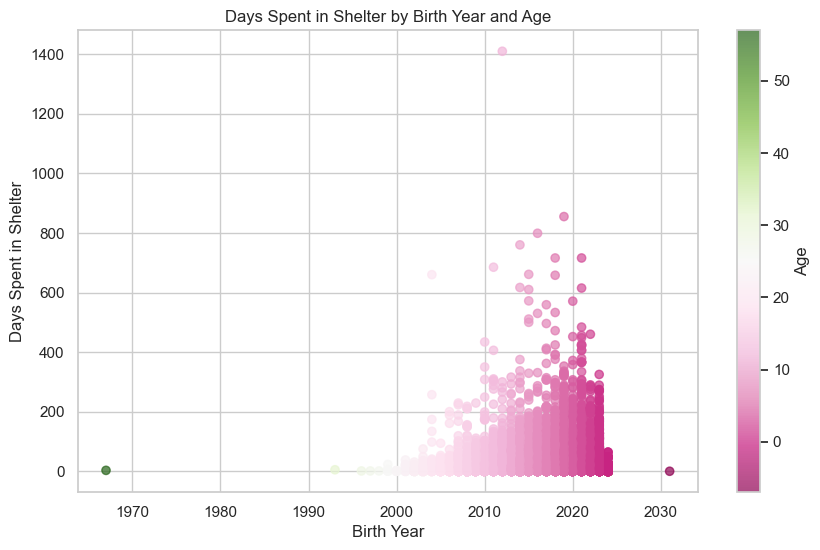

In [68]:
# Scatterplot illustrating relation of number of days spent in shelter and age of an animal

# Convert data to DataFrame
df = pd.DataFrame(df2)
# Calculate 'Age' from 'Birth Year'
current_year = pd.to_datetime('today').year
df['Age'] = current_year - df['Birth Year']
# Convert 'Intake Date' to datetime
df['Intake Date'] = pd.to_datetime(df['Intake Date'])
# Scatter plot with 'Birth Year', 'Days Spent in Shelter', and 'Age'
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Birth Year'], df['Days Spent in Shelter'], c=df['Age'], cmap='PiYG', alpha=0.7)
plt.colorbar(scatter, label='Age')
plt.xlabel('Birth Year')
plt.ylabel('Days Spent in Shelter')
plt.title('Days Spent in Shelter by Birth Year and Age')
plt.grid(True)
plt.show()

### Animal Shelter Adoption Predictions - Machine Learning Models

## Logistic Regression Model 
The goal of this model is to predict the survivability of animals in Long Beach Shelter based on color, sex, outcome type etc.  

In [36]:
# Importing the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [69]:
df2.head()

,Animal ID,Animal Type,Primary Color,Sex,Birth Year,Intake Date,Intake Condition,Intake Type,Intake Subtype,Outcome Date,Jurisdiction,Outcome Type,Outcome Subtype,latitude,longitude,outcome_is_dead,was_outcome_alive,geopoint,Days Spent in Shelter
0,A604282,CAT,ORG TABBY,Unknown,2017,2018-02-28,INJURED SEVERE,STRAY,FIELD,2018-02-28,LONG BEACH,EUTHANASIA,INJ SEVERE,33.802303,-118.215724,True,0,"33.8023034, -118.2157238",0
1,A624662,WILD,GRAY,Unknown,2019,2019-04-13,NORMAL,WILDLIFE,OTC,2019-04-13,LONG BEACH,RESCUE,OTHER RESC,33.870456,-118.204580,False,1,"33.8704558, -118.2045799",0
2,A597162,CAT,ORANGE,Female,2017,2017-09-15,UNDER AGE/WEIGHT,STRAY,FIELD,2017-09-18,LONG BEACH,RESCUE,FNDANIFOUN,33.810801,-118.215532,False,1,"33.81080120000001, -118.2155321",3
3,A601269,DOG,BROWN,Female,2016,2017-12-21,NORMAL,STRAY,FIELD,2017-12-29,LONG BEACH,TRANSFER,SPCALA,33.788147,-118.171891,False,1,"33.7881471, -118.1718914",8
4,A651770,CAT,BLACK,Neutered,2020,2020-11-21,NORMAL,STRAY,OTC,2021-01-23,LONG BEACH,ADOPTION,PFE/PAWSHP,33.787839,-118.139462,False,1,"33.7878394, -118.1394618",63


<function matplotlib.pyplot.show(close=None, block=None)>

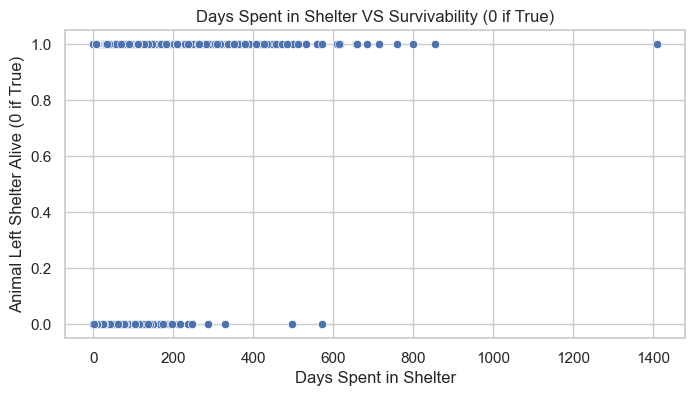

In [45]:
# Create a scatter plot showing relation between alive outcome of an animal and days spent in the shelter.

plt.figure(figsize=(8, 4))
plt.title('Days Spent in Shelter VS Survivability (0 if True)')

sns.scatterplot(data=df2, x='Days Spent in Shelter', y ='was_outcome_alive')
plt.xlabel('Days Spent in Shelter')
plt.ylabel('Animal Left Shelter Alive (0 if True)')

plt.show

Text(0, 0.5, 'Animal Left Shelter Alive (0 if True)')

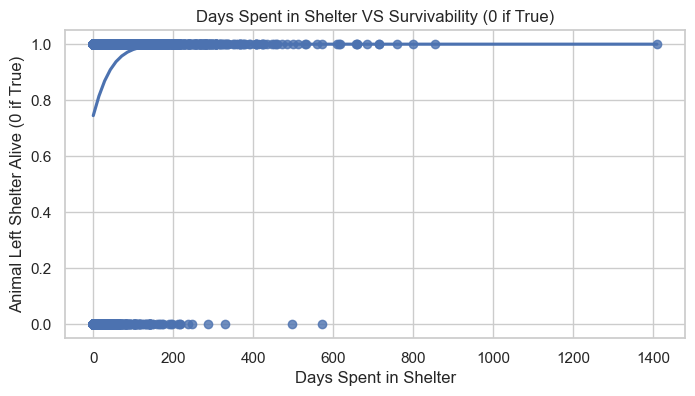

In [70]:
#  Add sigmoid curve
plt.figure(figsize=(8, 4)) # Create a figure and an axis object
sns.regplot(x='Days Spent in Shelter', y ='was_outcome_alive', data=df2, logistic=True, ci=None)
plt.title('Days Spent in Shelter VS Survivability (0 if True)')
plt.xlabel('Days Spent in Shelter')
plt.ylabel('Animal Left Shelter Alive (0 if True)')

In [6]:
# Drop unnecessary columns for optimized LR Model 
df3 = df2.drop(columns=['outcome_is_dead','Animal ID','Birth Year','Intake Date','Outcome Date','Jurisdiction','Intake Subtype','Outcome Subtype','latitude','longitude','geopoint'], axis=1)
df3

,Animal Type,Primary Color,Sex,Intake Condition,Intake Type,Outcome Type,was_outcome_alive,Days Spent in Shelter
0,CAT,ORG TABBY,Unknown,INJURED SEVERE,STRAY,EUTHANASIA,0,0
1,WILD,GRAY,Unknown,NORMAL,WILDLIFE,RESCUE,1,0
2,CAT,ORANGE,Female,UNDER AGE/WEIGHT,STRAY,RESCUE,1,3
3,DOG,BROWN,Female,NORMAL,STRAY,TRANSFER,1,8
4,CAT,BLACK,Neutered,NORMAL,STRAY,ADOPTION,1,63
...,...,...,...,...,...,...,...,...
20527,DOG,BLACK,Female,NORMAL,STRAY,RETURN TO OWNER,1,2
20528,DOG,BLACK,Neutered,NORMAL,STRAY,RETURN TO OWNER,1,0
20529,DOG,BROWN,Male,NORMAL,STRAY,TRANSFER,1,7
20530,DOG,TAN,Female,NORMAL,STRAY,TRANSFER,1,6


In [7]:
# Create dummy variables for remaining columns in df3
df3_one_hot_encoded_data = pd.get_dummies(data=df3, columns = ['Animal Type','Outcome Type', 'Sex', 'Primary Color','Intake Type', 'Intake Condition'])
df3_one_hot_encoded_data

,was_outcome_alive,Days Spent in Shelter,Animal Type_BIRD,Animal Type_CAT,Animal Type_DOG,Animal Type_GUINEA PIG,Animal Type_LIVESTOCK,Animal Type_OTHER,Animal Type_RABBIT,Animal Type_REPTILE,...,Intake Condition_I/I REPORT,Intake Condition_ILL MILD,Intake Condition_ILL MODERATETE,Intake Condition_ILL SEVERE,Intake Condition_INJURED MILD,Intake Condition_INJURED MODERATE,Intake Condition_INJURED SEVERE,Intake Condition_NORMAL,Intake Condition_UNDER AGE/WEIGHT,Intake Condition_WELFARE SEIZURES
0,0,0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1,3,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,8,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,1,63,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20527,1,2,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
20528,1,0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
20529,1,7,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
20530,1,6,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [159]:
# Import necessary packages
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.datasets import load_iris

In [181]:
# Declare the dependent and target variables
feature_vars = ["Days Spent in Shelter"]
X = df3_one_hot_encoded_data[feature_vars]

# We want to predict wether an animal will survive given its outcome type, sex, primary color, intake type and intake condition. 
Y = df3_one_hot_encoded_data['was_outcome_alive']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
# we use the train_test_split function from the sklearn.model_selection library

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=42)

In [182]:
X

,Days Spent in Shelter
0,0
1,0
2,3
3,8
4,63
...,...
20527,2
20528,0
20529,7
20530,6


In [183]:
# Fit the logistic regression

logreg = LogisticRegression() 

logreg.fit(X_train, Y_train)

LogisticRegression()

In [184]:
#Interpret intercept
logreg.intercept_

array([1.06767394])

In [185]:
# Interpret coefficient
logreg.coef_

array([[0.02910983]])

In [186]:
df3_one_hot_encoded_data

,was_outcome_alive,Days Spent in Shelter,Animal Type_BIRD,Animal Type_CAT,Animal Type_DOG,Animal Type_GUINEA PIG,Animal Type_LIVESTOCK,Animal Type_OTHER,Animal Type_RABBIT,Animal Type_REPTILE,...,Intake Condition_I/I REPORT,Intake Condition_ILL MILD,Intake Condition_ILL MODERATETE,Intake Condition_ILL SEVERE,Intake Condition_INJURED MILD,Intake Condition_INJURED MODERATE,Intake Condition_INJURED SEVERE,Intake Condition_NORMAL,Intake Condition_UNDER AGE/WEIGHT,Intake Condition_WELFARE SEIZURES
0,0,0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1,3,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,8,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,1,63,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20527,1,2,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
20528,1,0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
20529,1,7,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
20530,1,6,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [187]:
# Checking the model's accuracy on the entire dataset
logreg.predict_proba(X)

array([[0.25584569, 0.74415431],
       [0.25584569, 0.74415431],
       [0.23957637, 0.76042363],
       ...,
       [0.21901038, 0.78098962],
       [0.22403017, 0.77596983],
       [0.250343  , 0.749657  ]])

In [188]:
df3_one_hot_encoded_data['was_outcome_alive'].value_counts()

was_outcome_alive
1    16410
0     4122
Name: count, dtype: int64

In [189]:
# Calculate the baseline accuracy by dividing 900 by the total number of animals
16410 / (16410+4122)

0.799240210403273

In [190]:
# Evaluate the model
logreg.score(X, Y)

0.799240210403273

In [191]:
#Let's compare this baseline accuracy to the accuracy rates for our model (on both the training and testing sets).
#It is a good idea to display all three values against each other for comparison:

print('training accuracy: ' + str(logreg.score(X_train,Y_train)))
print('testing accuracy: ' + str(logreg.score(X_test,Y_test)))
print('baseline accuracy: ' + str(df['was_outcome_alive'].value_counts(normalize = True).max()))

training accuracy: 0.7992694063926941
testing accuracy: 0.7991234477720964
baseline accuracy: 0.7942785795600602


In [193]:
# Confusion Matrix
# Let's collect the predicted values and actual values from our dataset
y_true=Y_train
y_pred=logreg.predict(X_train)

# Next, we will build the confusion matrix as a dataframe
pd.DataFrame(confusion_matrix(y_true,y_pred))

# Top Left is True Negative; Bottom Right is True Positive
# Top Right is False Positive -- predicted positive, but actually negative 
# Bottom Left is False Negative -- predicted negative, but actually positive

,0,1
0,0,3297
1,0,13128


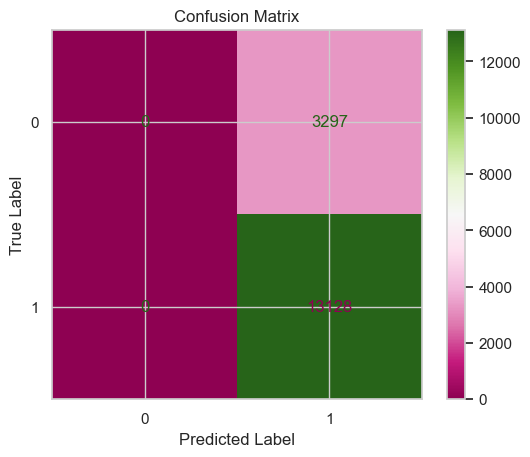

In [194]:
# Create Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix with "PiYG" colormap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap='PiYG')

# Add title and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show plot
plt.show()

In [195]:
#Evaluate the Model
from sklearn.metrics import precision_score, recall_score

print('Precision: ' + str(precision_score(y_true,y_pred)))
print('Recall: ' + str(recall_score(y_true,y_pred)))

Precision: 0.7992694063926941
Recall: 1.0


In [196]:
# Include Classification report
from sklearn.metrics import classification_report

print(classification_report(y_true,y_pred))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3297
           1       0.80      1.00      0.89     13128

    accuracy                           0.80     16425
   macro avg       0.40      0.50      0.44     16425
weighted avg       0.64      0.80      0.71     16425



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [197]:
# Use the model to make predictions
# Let's predict the label for three different animals
vals_to_predict = pd.DataFrame({'Days Spent in Shelter': [60, 2, 0]})

# The predict_proba function shows the probability of each of these animals living through their shelter stay
logreg.predict_proba(vals_to_predict)

array([[0.05655825, 0.94344175],
       [0.24491972, 0.75508028],
       [0.25584569, 0.74415431]])

In [198]:
# The predict function shows whether the model assigns the label 0 (below average) or 1 (above average)
logreg.predict(vals_to_predict)

array([1, 1, 1], dtype=int64)

## Decision Tree Model 
The goal of this model is to predict the chances for adoption in Long Beach Shelter. 

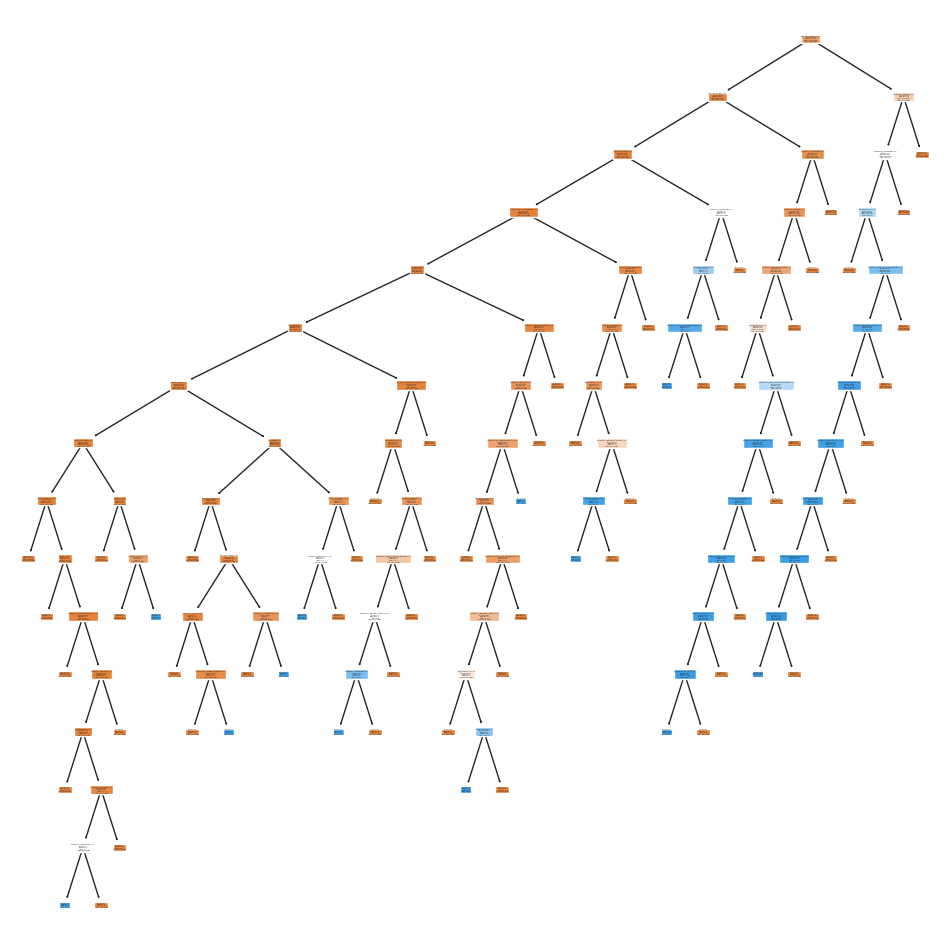

In [73]:
# Build the Decision Tree Model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Identify categorical features and convert them to numerical using one-hot encoding
df_new_encoded = pd.get_dummies(df3)

# Separate features and target variable
X = df_new_encoded.drop(columns=['Outcome Type_ADOPTION'], axis=1) 
Y = df_new_encoded['Outcome Type_ADOPTION'] 

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, train_size=0.8, random_state=42)

# Instantiate and train a DecisionTreeClassifier with entropy as the criterion
dec_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
dec_tree.fit(X_train, Y_train)

# Define the class names
class_names = ['Not Adopted', 'Adopted']

# Now we can visualize the trained decision tree
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(dec_tree, feature_names=X.columns, class_names=class_names, filled=True, ax=ax)
plt.show()


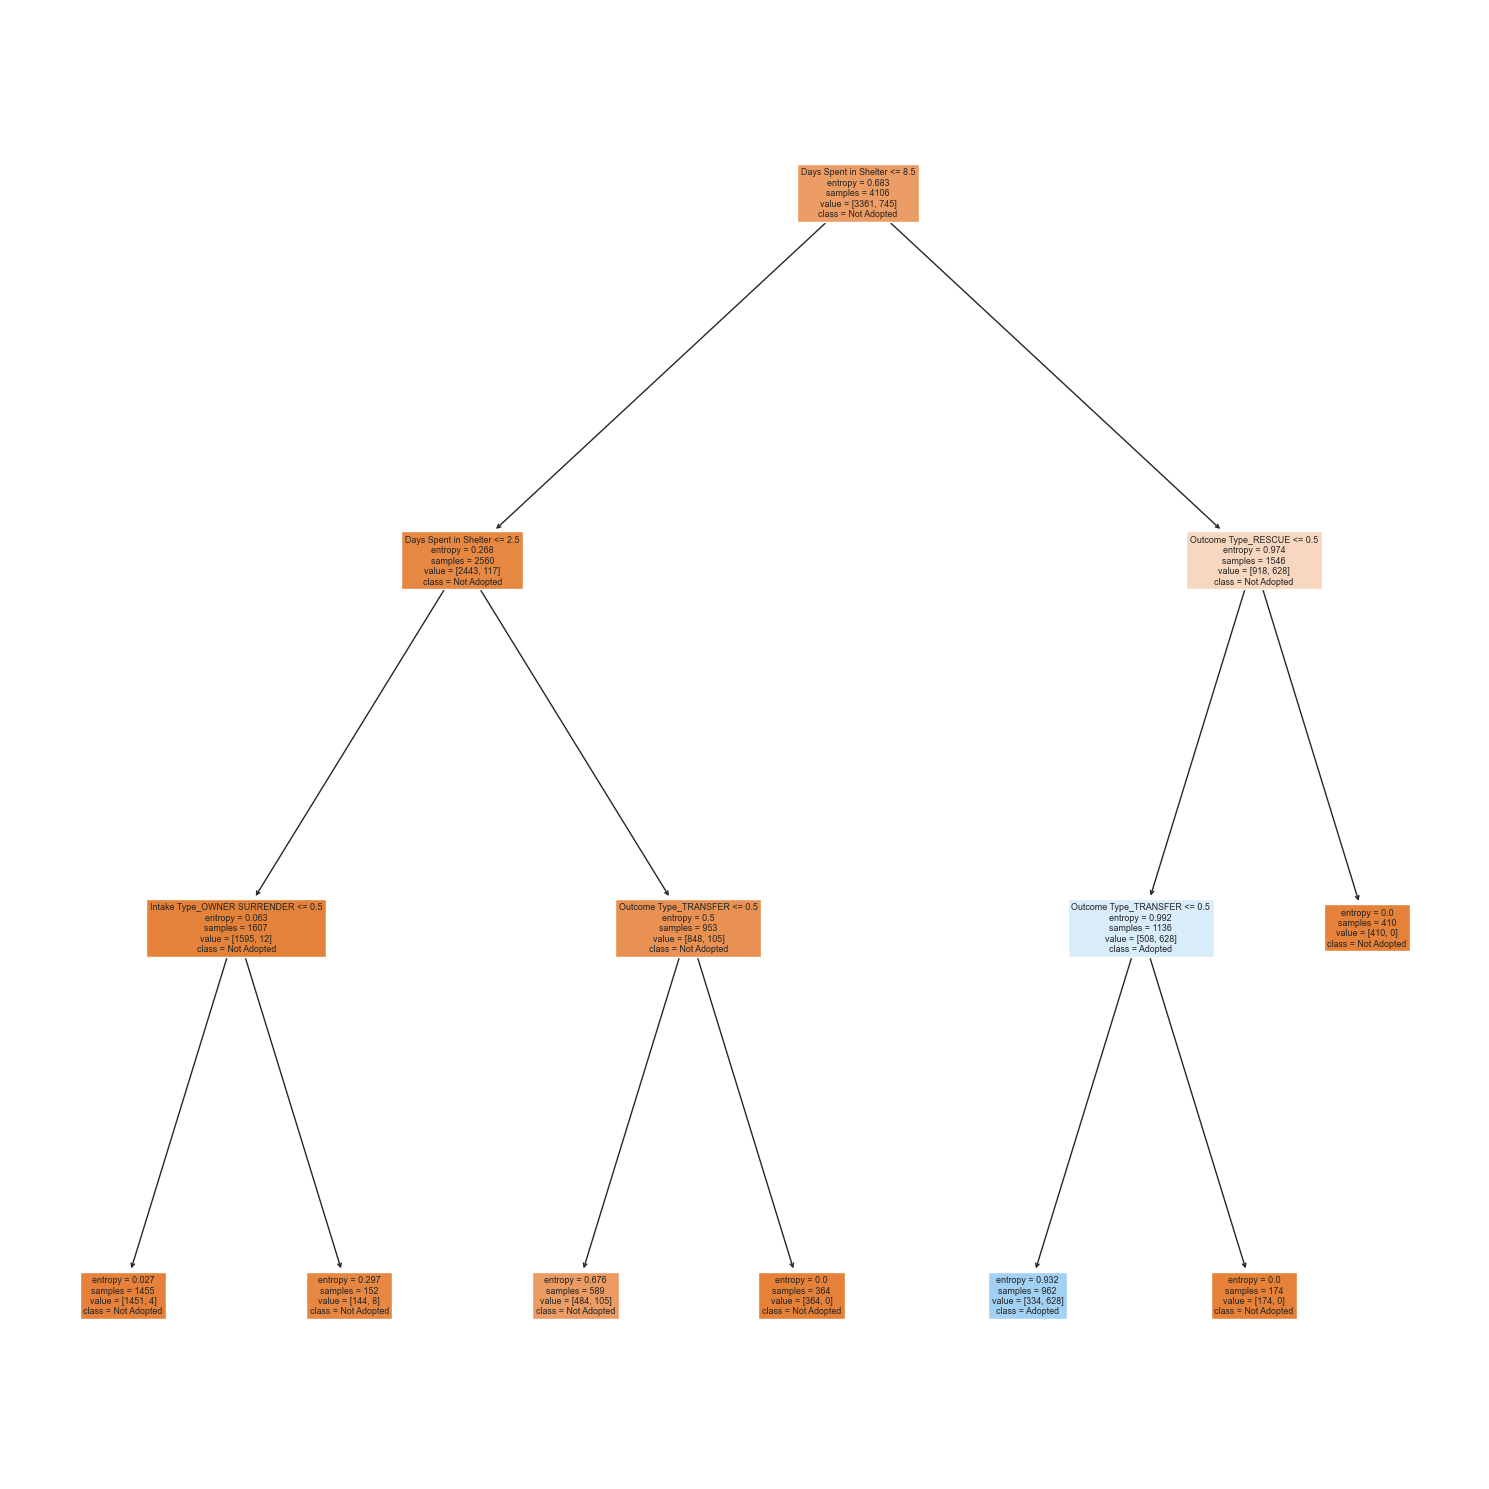

In [97]:
# Because our Decision Tree is too large and unreadable to portray in our presentation, we will use max_depth=3 to limit the display. 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Identify categorical features and convert them to numerical using one-hot encoding
df_new_encoded = pd.get_dummies(df3)

# Separate features and target variable
X = df_new_encoded.drop(columns=['Outcome Type_ADOPTION'], axis=1)  # Exclude the target variable
Y = df_new_encoded['Outcome Type_ADOPTION']  # Only the target variable

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, train_size=0.2, random_state=42)

# Instantiate and train a DecisionTreeClassifier with entropy as the criterion
# Limiting the depth of the decision tree to 3 for example
dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dec_tree.fit(X_train, Y_train)

# Define the class names
class_names = ['Not Adopted', 'Adopted']

# Now we can visualize the trained decision tree
fig, ax = plt.subplots(figsize=(15, 15))  # Adjust the figsize as needed
plot_tree(dec_tree, feature_names=X.columns, class_names=class_names, filled=True, ax=ax)
plt.tight_layout()

# Export this tree to a png file
plt.savefig('decision_tree.png')
plt.show()


In [29]:
# Fit our Decision Tree Model 
dec_tree=DecisionTreeClassifier()
dec_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [33]:
# Calculate baseline accuracy
baseline_accuracy = Y_train.value_counts(normalize=True).max() * 100
print("Baseline Accuracy:", baseline_accuracy)

Baseline Accuracy: 81.86301369863014


In [32]:
# Evualuate our Decision Tree Model
print('Train score: '+str(dec_tree.score(X_train,Y_train)))
print('Test score: '+str(dec_tree.score(X_test,Y_test)))

Train score: 1.0
Test score: 0.9948867786705624


In [78]:
# Print our classification report
from sklearn.metrics import classification_report

Y_pred = dec_tree.predict(X_test)
report = classification_report(Y_test, Y_pred, target_names=class_names)
print(report)


              precision    recall  f1-score   support

 Not Adopted       0.98      0.89      0.93      3362
     Adopted       0.64      0.92      0.76       745

    accuracy                           0.89      4107
   macro avg       0.81      0.91      0.85      4107
weighted avg       0.92      0.89      0.90      4107



In [40]:
# Feature prioritising 

feature_importances=pd.DataFrame({'Feature':X.columns,'Feature Importance':dec_tree.feature_importances_})
display(feature_importances)

,Feature,Feature Importance
0,was_outcome_alive,0.000000
1,Days Spent in Shelter,0.478236
2,Animal Type_BIRD,0.000000
3,Animal Type_CAT,0.000000
4,Animal Type_DOG,0.000000
...,...,...
127,Outcome Type_RETURN TO OWNER,0.000000
128,Outcome Type_RETURN TO RESCUE,0.000000
129,"Outcome Type_SHELTER, NEUTER, RETURN",0.000000
130,Outcome Type_TRANSFER,0.250551


In [79]:
# Because there are 131 features that will not fit in a plot,  we will choose feature importance that display only non-zero features in a bar chart
# Calculate feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Feature Importance': dec_tree.feature_importances_})

# Filter feature importances to display only non-zero importance features
non_zero_importance_features = feature_importances[feature_importances['Feature Importance'] != 0]

# Display filtered feature importances
display(non_zero_importance_features)

,Feature,Feature Importance
1,Days Spent in Shelter,0.478236
116,Intake Type_RETURN,0.012107
126,Outcome Type_RESCUE,0.259106
130,Outcome Type_TRANSFER,0.250551


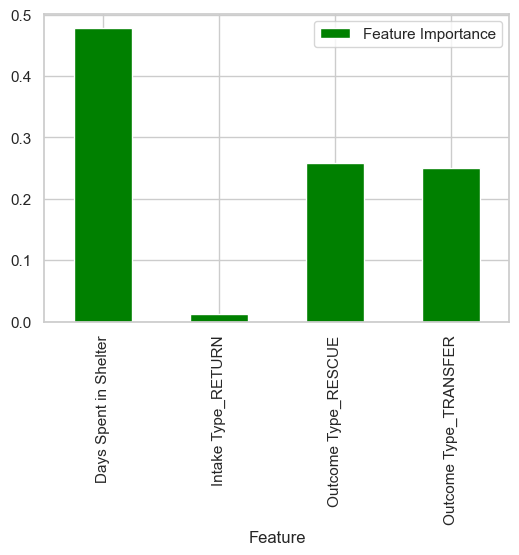

In [88]:
# Display Non-Zero Features in a bar chart
fig, ax = plt.subplots(figsize=(6,4))
non_zero_importance_features.plot(x='Feature',y='Feature Importance',kind='bar',ax=ax, color='green')
plt.show()

## Random Forest Model 
The goal of this model is to predict the chances for adoption in Long Beach Shelter. 

In [49]:
# Build the Random Forest Model 
# Separate features and target variable
X = df_new_encoded.drop(columns=['Outcome Type_ADOPTION'], axis=1)  # Exclude the target variable
Y = df_new_encoded['Outcome Type_ADOPTION']  # Only the target variable

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, train_size=0.8, random_state=42)

In [50]:
# Set number of estimators for our ensemble method
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=1000) #1000 decision makers is often a good number to go for
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000)

In [52]:
# Evaluate our Random Forest Model
print('Train score: '+str(rf.score(X_train,Y_train)))
print('Test score: '+str(rf.score(X_test,Y_test)))

Train score: 1.0
Test score: 0.9968346725103482


In [53]:
# Calculate baseline accuracy
baseline_accuracy = Y_train.value_counts(normalize=True).max() * 100
print("Baseline Accuracy:", baseline_accuracy)

Baseline Accuracy: 81.86301369863014


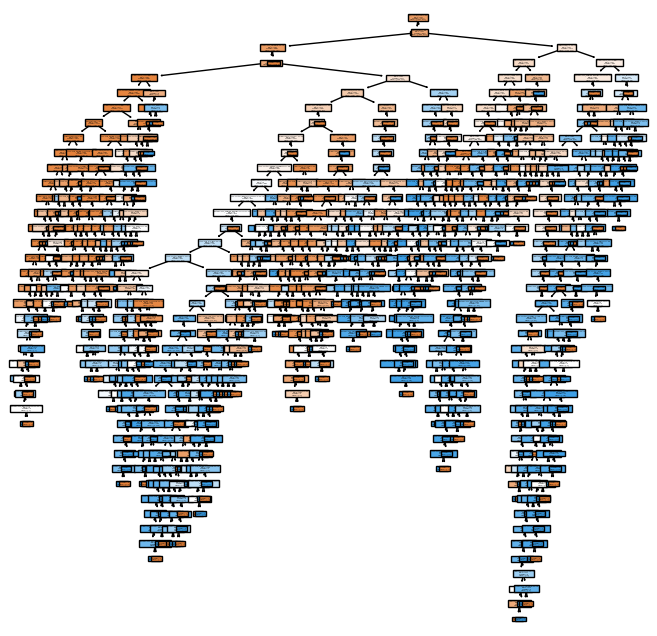

In [54]:
# View the random estimator tree # 235 to see how it assigned our data 
fig, ax= plt.subplots(figsize=(8,8))
plot_tree(rf.estimators_[235],feature_names=X.columns,filled=True,ax=ax)
plt.show()

In [55]:
#Calculate the feature importance for Random Forest
feature_importances=pd.DataFrame({'Feature':X.columns,
                                  'Feature Importance':rf.feature_importances_})
display(feature_importances)

,Feature,Feature Importance
0,was_outcome_alive,0.039521
1,Days Spent in Shelter,0.179064
2,Animal Type_BIRD,0.001150
3,Animal Type_CAT,0.008178
4,Animal Type_DOG,0.008940
...,...,...
127,Outcome Type_RETURN TO OWNER,0.090455
128,Outcome Type_RETURN TO RESCUE,0.003676
129,"Outcome Type_SHELTER, NEUTER, RETURN",0.072585
130,Outcome Type_TRANSFER,0.109057


In [62]:
# Due to large number of important features in Random Forest, we will limit the display to top 5. 
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Create a DataFrame to store feature names and their corresponding importances
feature_importances = pd.DataFrame({'Feature': X.columns,
                                    'Feature Importance': rf.feature_importances_})

# Sort the feature importances DataFrame by importance values
feature_importances_sorted = feature_importances.sort_values(by='Feature Importance', ascending=False)

# Select the top 5 most important features
top_5_features = feature_importances_sorted.head(5)

# Display the top 5 most important features
display(top_5_features)

,Feature,Feature Importance
1,Days Spent in Shelter,0.179064
126,Outcome Type_RESCUE,0.165366
130,Outcome Type_TRANSFER,0.109057
127,Outcome Type_RETURN TO OWNER,0.090455
129,"Outcome Type_SHELTER, NEUTER, RETURN",0.072585


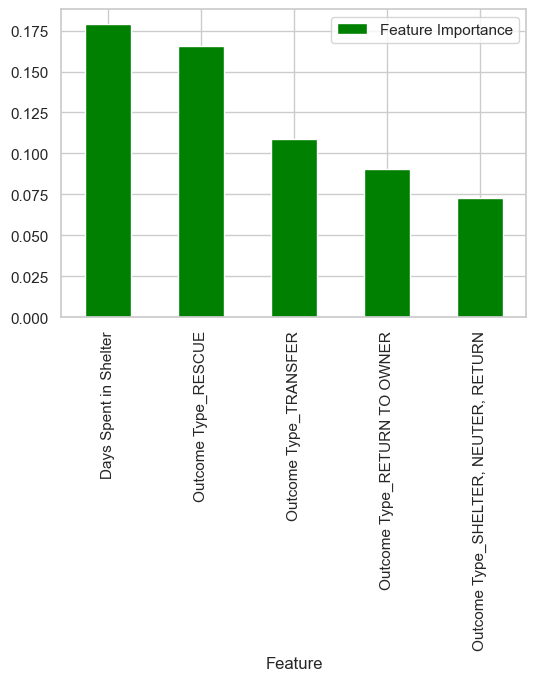

In [98]:
# Display top 5 feature importance for our Random Forest Model
fig, ax = plt.subplots(figsize=(6,4))
top_5_features.plot(x='Feature',y='Feature Importance',kind='bar',ax=ax, color='green')
plt.show()